<a href="https://colab.research.google.com/github/ejrtks1020/Deep_Learning/blob/main/Plant_Pathology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 디렉토리 구조 확인하고 학습과 테스트용 메타 정보를 DataFrame으로 생성

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'/DLCV

/content/drive/MyDrive/Colab Notebooks/DLCV


In [ ]:
!ls -lia

total 798907
108 drwx------ 2 root root      4096 Dec 17 16:03 efficientdet
109 drwx------ 2 root root      4096 Dec 17 16:03 faster_rcnn
105 -rw------- 1 root root    982346 Oct 31 10:14 kaggle.zip
107 drwx------ 2 root root      4096 Dec 17 16:03 mask_rcnn
112 -rw------- 1 root root 817072693 Jan 12 16:52 plant-pathology-2020-fgvc7.zip
110 drwx------ 2 root root      4096 Dec 17 16:03 preliminary
111 drwx------ 2 root root      4096 Dec 17 16:03 ssd
106 drwx------ 2 root root      4096 Dec 17 16:03 yolo


In [ ]:
!mkdir /content/plant

In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'/DLCV

/content/drive/MyDrive/Colab Notebooks/DLCV


In [ ]:
!unzip 'plant-pathology-2020-fgvc7.zip' -d /content/plant

In [ ]:
%cd /content
!pwd

/content
/content


In [ ]:
#@title
import numpy as np
import pandas as pd

import os

for dirname, _, filenames in os.walk('/content/plant'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import numpy as np 
import pandas as pd 
import os

test_df = pd.read_csv("/content/plant/test.csv")
train_df = pd.read_csv("/content/plant/train.csv")

In [ ]:
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


### healthy, multiple_diseases, rust, scab 컬럼이 원핫 인코딩 형식으로 되어 있음. 

In [ ]:
# healthy, multiple_diseases, rust, scab 컬럼을 합해서 sum을 만들고 sum이 1보다 큰지, 아니면 0인지 확인. 
train_df['sum'] = train_df['healthy'] + train_df['multiple_diseases'] + train_df['rust'] + train_df['scab']
train_df[(train_df['sum'] > 1) | (train_df['sum']==0)] 

,image_id,healthy,multiple_diseases,rust,scab,sum


### 이미지의 절대 경로를 DataFrame에 추가하고, 개별 컬럼별 0/1 값을 구분하여 클래스 라벨로 생성. 

In [ ]:
pd.set_option("max_colwidth", 100)

IMAGE_DIR = '/content/plant/images'
train_df['path'] = IMAGE_DIR + '/' + train_df['image_id'] + '.jpg'
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,sum,path
0,Train_0,0,0,0,1,1,/content/plant/images/Train_0.jpg
1,Train_1,0,1,0,0,1,/content/plant/images/Train_1.jpg
2,Train_2,1,0,0,0,1,/content/plant/images/Train_2.jpg
3,Train_3,0,0,1,0,1,/content/plant/images/Train_3.jpg
4,Train_4,1,0,0,0,1,/content/plant/images/Train_4.jpg


In [ ]:
def get_label(x):
    if x['healthy'] == 1:
        return 'healthy'
    elif x['multiple_diseases'] == 1:
        return 'multiple_diseases'
    elif x['rust'] == 1:
        return 'rust'
    elif x['scab'] == 1:
        return 'scab'
    else: return 'None'


train_df['label'] = train_df.apply(lambda x:get_label(x), axis=1)
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,sum,path,label
0,Train_0,0,0,0,1,1,/content/plant/images/Train_0.jpg,scab
1,Train_1,0,1,0,0,1,/content/plant/images/Train_1.jpg,multiple_diseases
2,Train_2,1,0,0,0,1,/content/plant/images/Train_2.jpg,healthy
3,Train_3,0,0,1,0,1,/content/plant/images/Train_3.jpg,rust
4,Train_4,1,0,0,0,1,/content/plant/images/Train_4.jpg,healthy


In [ ]:
## 학습 이미지 건수 및 label별 건수
print('train shape:', train_df.shape)
print('label 별 건수')
train_df['label'].value_counts()

train shape: (1821, 8)
label 별 건수


rust                 622
scab                 592
healthy              516
multiple_diseases     91
Name: label, dtype: int64

### 원본 이미지 시각화
* 녹병균 (Rust), 박테리아성 질환(scab), 복합질병(multiple_diseases), 건강(healthy)
* 이미지 size는 (1365, 2048)

(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)


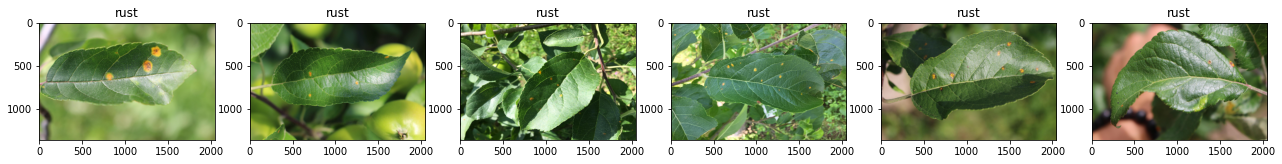

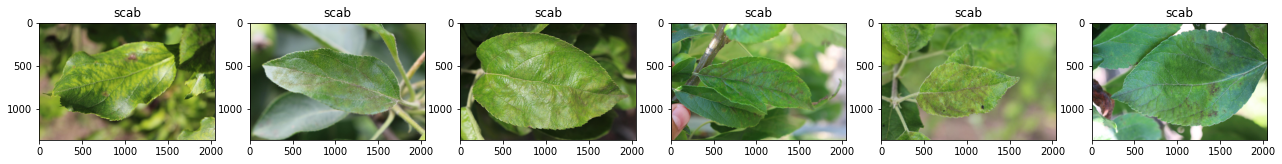

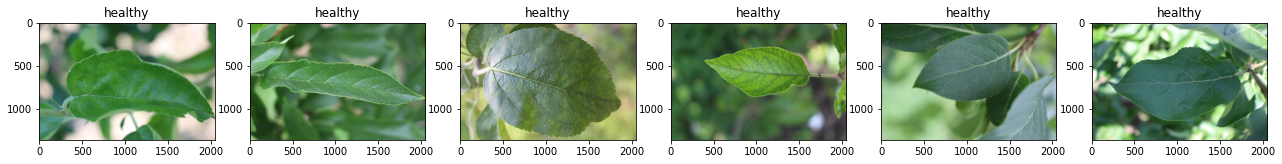

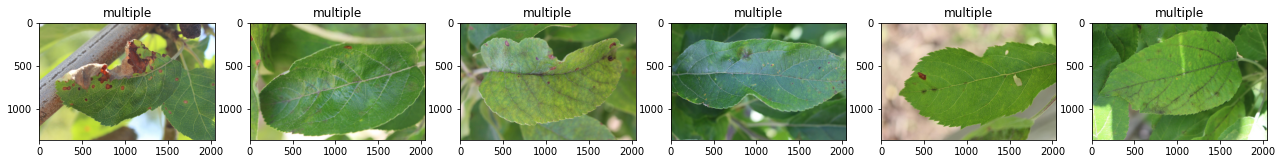

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_grid_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        #axs[i].axis('off')
        axs[i].set_title(title)
        print(image.shape)
        
rust_image_list = train_df[train_df['label']=='rust']['path'].iloc[:6].tolist()
scab_image_list = train_df[train_df['label']=='scab']['path'].iloc[:6].tolist()
healthy_image_list = train_df[train_df['label']=='healthy']['path'].iloc[:6].tolist()
multiple_image_list = train_df[train_df['label']=='multiple_diseases']['path'].iloc[:6].tolist()

show_grid_images(rust_image_list, ncols=6, title='rust')
show_grid_images(scab_image_list, ncols=6, title='scab')
show_grid_images(healthy_image_list, ncols=6, title='healthy')
show_grid_images(multiple_image_list, ncols=6, title='multiple')

### 이미지 Augmentation 적용. 
* cutout과 같은 noise는 나뭇잎의 병균 반점과 헷갈릴 수 있으므로 사용하지 않음. 
* 전체 이미지가 초록색 계열이고 병균 반점이 특정 색깔을 가지고 있으므로 색상의 변화는 적용하지 않음. 
* 전반적으로 판별하려는 나뭇잎이 전체 이미지의 중앙에 와있음. scale등의 적용 고려. 

(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)


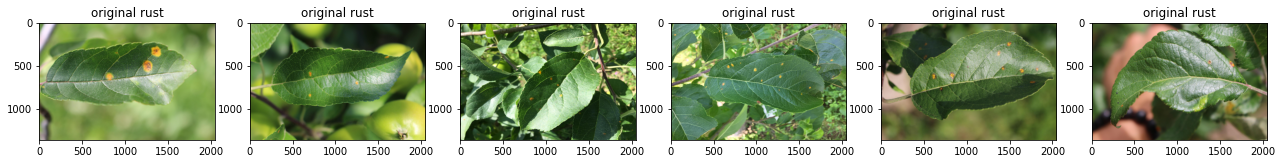

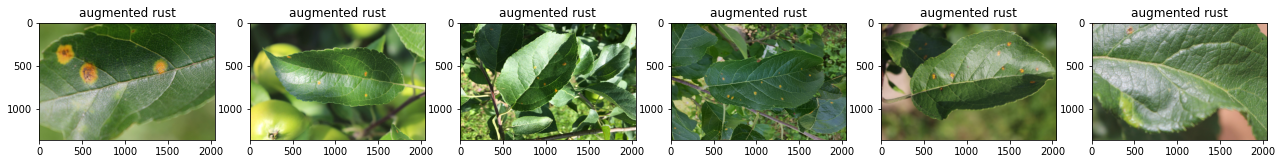

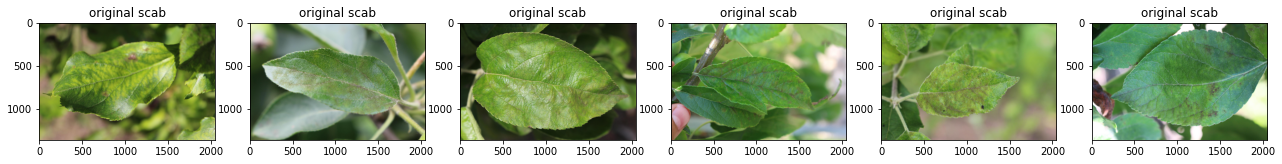

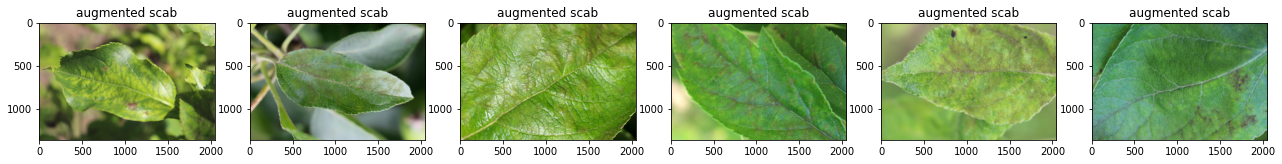

In [ ]:
import albumentations as A

augmentor_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.5, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.Blur(p=0.2)
])

show_grid_images(rust_image_list, augmentor=None, ncols=6, title='original rust')
show_grid_images(rust_image_list, augmentor=augmentor_01, ncols=6, title='augmented rust')

show_grid_images(scab_image_list, augmentor=None, ncols=6, title='original scab')
show_grid_images(scab_image_list, augmentor=augmentor_01, ncols=6, title='augmented scab')

### Sequence기반의 Dataset 생성
* 기존엔 image size가 높이와 너비가 동일하였으나, 이번엔 높이와 너비가 다를 수 있을 경우를 고려하여 image_size를 튜플로 입력
* opencv의 resize()는 인자로 이미지 크기를 입력 받는데 가로x세로(너비x높이)의 개념으로 입력 받음. 이미지 배열의 경우는 행x열(높이x너비) 이므로 resize()호출시 이를 감안할것. 
* 캐글 컴피티션에 테스트 데이터의 결과를 submit하므로 테스트 데이트의 Label이 없음. 때문에 Dataset의 label_batch 값이 None이 될 수 있는 경우를 감안해서 코드 재수정 필요. 

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

# 입력 인자 image_filenames, labels는 모두 numpy array로 들어옴. image size는 (높이, 너비)로 수정. 
class Plant_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=(224, 224), batch_size=64, 
                 augmentor=None, shuffle=False, pre_func=None):
        '''
        파라미터 설명
        image_filenames: opencv로 image를 로드할 파일의 절대 경로들
        labels: 해당 image의 label들
        batch_size: __getitem__(self, index) 호출 시 마다 가져올 데이터 batch 건수
        augmentor: albumentations 객체
        shuffle: 학습 데이터의 경우 epoch 종료시마다 데이터를 섞을지 여부
        '''
        # 객체 생성 인자로 들어온 값을 객체 내부 변수로 할당. 
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data의 경우 
        self.shuffle = shuffle
        if self.shuffle:
            # 객체 생성시에 한번 데이터를 섞음. 
            #self.on_epoch_end()
            pass
    
    # Sequence를 상속받은 Dataset은 batch_size 단위로 입력된 데이터를 처리함. 
    # __len__()은 전체 데이터 건수가 주어졌을 때 batch_size단위로 몇번 데이터를 반환하는지 나타남
    def __len__(self):
        # batch_size단위로 데이터를 몇번 가져와야하는지 계산하기 위해 전체 데이터 건수를 batch_size로 나누되, 정수로 정확히 나눠지지 않을 경우 1회를 더한다. 
        return int(np.ceil(len(self.image_filenames) / self.batch_size))
    
    # batch_size 단위로 image_array, label_array 데이터를 가져와서 변환한 뒤 다시 반환함
    # 인자로 몇번째 batch 인지를 나타내는 index를 입력하면 해당 순서에 해당하는 batch_size 만큼의 데이타를 가공하여 반환
    # batch_size 갯수만큼 변환된 image_array와 label_array 반환. 
    def __getitem__(self, index):
        # index는 몇번째 batch인지를 나타냄. 
        # batch_size만큼 순차적으로 데이터를 가져오려면 array에서 index*self.batch_size:(index+1)*self.batch_size 만큼의 연속 데이터를 가져오면 됨
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        
        # label_batch가 None이 될 수 있음. 
        else: 
            label_batch = None
        # 만일 객체 생성 인자로 albumentation으로 만든 augmentor가 주어진다면 아래와 같이 augmentor를 이용하여 image 변환
        # albumentations은 개별 image만 변환할 수 있으므로 batch_size만큼 할당된 image_name_batch를 한 건씩 iteration하면서 변환 수행. 
        # image_batch 배열은 float32 로 설정. 
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size[0], self.image_size[1], 3), dtype='float32')
        
        # batch_size에 담긴 건수만큼 iteration 하면서 opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음. 
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            #원본 이미지와 다르게 resize 적용. opencv의 resize은 (가로, 세로)의 개념임. 배열은 (높이, 너비)의 개념이므로 이에 주의하여 opencv resize 인자 입력 필요.  
            image = cv2.resize(image, (self.image_size[1], self.image_size[0]))
            # 만일 preprocessing_input이 pre_func인자로 들어오면 이를 이용하여 scaling 적용. 
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch
    
    # epoch가 한번 수행이 완료 될 때마다 모델의 fit()에서 호출됨. 
    def on_epoch_end(self):
        if(self.shuffle):
            #print('epoch end')
            # 전체 image 파일의 위치와 label를 쌍을 맞춰서 섞어준다. scikt learn의 utils.shuffle에서 해당 기능 제공
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass

### 학습 데이터용 DataFrame에서 학습용/검증용 이미지 절대 경로와 Label 추출하고 이를 Dataset으로 생성. 
* 이미 학습용 DataFrame에 'healthy', 'multiple_diseases', 'rust', 'scab' 순으로 원핫 인코딩 되어 있음. 
* 캐글에서 테스트 데이터 예측한 결과를 'healthy', 'multiple_diseases', 'rust', 'scab' 순서로 제출을 요구하므로 이를 별도로 다시 원-핫 인코딩 해서는 안됨. 
* Augmentation은 앞에서 생성한 augmentor_01을 적용. pre_func는 xception용 Preprocessing 함수 적용. 

In [ ]:
sample_df = pd.read_csv('/content/plant/sample_submission.csv')
sample_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


In [ ]:
from sklearn.model_selection import train_test_split

def get_train_valid(train_df, valid_size=0.2, random_state=2021):
    train_path = train_df['path'].values
    # 별도의 원핫인코딩을 하지 않고  'healthy', 'multiple_diseases', 'rust', 'scab' 컬럼들을 모두 Numpy array로 변환하는 수준으로 label을 원핫 인코딩 적용. 
    train_label = train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].values
    
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, test_size=valid_size, random_state=random_state)
    print('tr_path shape:', tr_path.shape, 'tr_label shape:', tr_label.shape, 'val_path shape:', val_path.shape, 'val_label shape:', val_label.shape)
    return tr_path, val_path, tr_label, val_label

In [ ]:
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

# image size는 224x224로 Dataset 생성. 
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64

tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)

tr_ds = Plant_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=augmentor_01, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Plant_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                      augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

tr_image_batch, tr_label_batch = next(iter(tr_ds))
val_image_batch, val_label_batch = next(iter(val_ds))
print(tr_image_batch.shape, val_image_batch.shape, tr_label_batch.shape, val_label_batch.shape)
print(tr_image_batch[0], val_image_batch[0])

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(64, 224, 224, 3) (64, 224, 224, 3) (64, 4) (64, 4)
[[[0.45098042 0.49803925 0.21568632]
  [0.39607847 0.4431373  0.16078436]
  [0.38823533 0.41960788 0.14509809]
  ...
  [0.5294118  0.5372549  0.2941177 ]
  [0.5137255  0.5372549  0.2941177 ]
  [0.5137255  0.5294118  0.28627455]]

 [[0.48235297 0.5058824  0.2313726 ]
  [0.3803922  0.45098042 0.16078436]
  [0.38823533 0.41960788 0.14509809]
  ...
  [0.5529412  0.5529412  0.34901965]
  [0.5529412  0.56078434 0.3176471 ]
  [0.5529412  0.5686275  0.32549024]]

 [[0.49803925 0.5294118  0.254902  ]
  [0.39607847 0.45882356 0.1686275 ]
  [0.41960788 0.45098042 0.17647064]
  ...
  [0.5686275  0.5686275  0.36470592]
  [0.56078434 0.5686275  0.32549024]
  [0.5686275  0.5764706  0.33333337]]

 ...

 [[0.49803925 0.8980392  0.35686278]
  [0.5058824  0.9372549  0.427451  ]
  [0.5137255  0.94509804 0.41960788]
  ...
  [0.34901965 0.7647059  0.32549024]


### create_model() 함수 생성. 
* resnet50v2, xception, efficientnetb0~b7 등의 Pretrained 모델을 생성 

In [ ]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.metrics import AUC

from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
import tensorflow as tf


def create_model(model_type='efficientnetb0', in_shape=(224, 224, 3), n_classes=4):
    input_tensor = Input(shape=in_shape)

    if model_type == 'resnet50v2':
        base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'xception':
        base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb0':
        base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb1':
        base_model = tf.keras.applications.EfficientNetB1(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb2':
        base_model = tf.keras.applications.EfficientNetB2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb3':
        base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb4':
        base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb5':
        base_model = tf.keras.applications.EfficientNetB5(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb6':
        base_model = tf.keras.applications.EfficientNetB6(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb7':
        base_model = tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
    x = base_model.output  
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)    
    preds = Dense(units=n_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=preds)
    

    return model

### xception 모델을 생성하고 학습 수행. 
* image size는 224x224로 생성. 
* Learning Rate Scheduler는 ReduceLROnPlateau로, 초기 Learning Rate는 0.0001로 설정. 
* epochs는 10회만 설정. 
* metrics는 ROC-AUC 설정

In [ ]:
from tensorflow.keras.metrics import AUC

xcp_model_01 = create_model(model_type='xception', in_shape=(224, 224, 3))
xcp_model_01.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=[AUC()])

# 3번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

history = xcp_model_01.fit(tr_ds, epochs=10, steps_per_epoch=int(np.ceil(tr_path.shape[0]/BATCH_SIZE)), 
               validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/BATCH_SIZE)),
               callbacks=([rlr_cb, ely_cb]), verbose=1)

83697664/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
23/23 [==============================] - 124s 5s/step - loss: 0.9954 - auc: 0.8415 - val_loss: 1.0781 - val_auc: 0.8434 - lr: 1.0000e-04
Epoch 2/10
23/23 [==============================] - 110s 5s/step - loss: 0.4729 - auc: 0.9615 - val_loss: 0.7906 - val_auc: 0.9296 - lr: 1.0000e-04
Epoch 3/10
23/23 [==============================] - 110s 5s/step - loss: 0.2909 - auc: 0.9856 - val_loss: 0.4371 - val_auc: 0.9676 - lr: 1.0000e-04
Epoch 4/10
23/23 [==============================] - 110s 5s/step - loss: 0.2741 - auc: 0.9867 - val_loss: 0.4060 - val_auc: 0.9738 - lr: 1.0000e-04
Epoch 5/10
23/23 [==============================] - 110s 5s/step - loss: 0.1760 - auc: 0.9939 - val_loss: 0.3668 - val_auc: 0.9770 - lr: 1.0000e-04
Epoch 6/10
23/23 [==============================] - 109s 5s/step - loss: 0.1617 - auc: 0.9944 - val_loss: 0.3035 - val_auc: 0.9785 - lr: 1.0000e-04
Epoch 7/10
23/23 [==============================] - 109s 5s/step - loss: 0.1392 - auc: 0.9953 - val_loss: 0.2563

### 테스트 데이터로 Plant의 질병을 예측하고 캐글에 제출할 submit csv 파일 만들기
* 테스트용 DataFrame에 이미지 경로 추가. 
* 테스트용 Dataset 생성. label은 테스트 데이터에서 알 수 없으므로 None으로 입력

In [ ]:
sample_df = pd.read_csv('/content/plant/sample_submission.csv')
sample_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


In [ ]:
IMAGE_DIR = '/content/plant/images'
test_df = pd.read_csv("/content/plant/test.csv")
test_df['path'] = IMAGE_DIR + '/' + test_df['image_id'] + '.jpg'

test_df.head(10)

,image_id,path
0,Test_0,/content/plant/images/Test_0.jpg
1,Test_1,/content/plant/images/Test_1.jpg
2,Test_2,/content/plant/images/Test_2.jpg
3,Test_3,/content/plant/images/Test_3.jpg
4,Test_4,/content/plant/images/Test_4.jpg
5,Test_5,/content/plant/images/Test_5.jpg
6,Test_6,/content/plant/images/Test_6.jpg
7,Test_7,/content/plant/images/Test_7.jpg
8,Test_8,/content/plant/images/Test_8.jpg
9,Test_9,/content/plant/images/Test_9.jpg


In [ ]:
# 테스트용 Dataset을 생성하고 이를 이용하여 model의 predict()를 호출하여 이미지 예측 수행. 

test_path = test_df['path'].values
# labels는 None을 입력하고 Dataset 생성. 
test_ds = Plant_Dataset(image_filenames=test_path, labels=None, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)
#predict()로 예측 수행. 
preds = xcp_model_01.predict(test_ds)

In [ ]:
preds_df = pd.DataFrame(preds)
preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
preds_df.head()

,healthy,multiple_diseases,rust,scab
0,0.000030,0.000058,9.999074e-01,4.029603e-06
1,0.000005,0.000152,9.998423e-01,9.868797e-07
2,0.000003,0.000026,8.732050e-07,9.999696e-01
3,0.999905,0.000005,6.572747e-05,2.458395e-05
4,0.000005,0.000171,9.998229e-01,9.971079e-07


In [ ]:
# 예측한 결과를 기반으로 별도의 결과 DataFrame을 생성. 
preds_df = pd.DataFrame(preds)
preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
# 테스트용 DataFrame에 바로 위에서 생성한 결과 DataFrame을 합친 뒤 이를 이용하여 submit용 DataFrame 생성.  
submit_df = pd.concat([test_df['image_id'], preds_df], axis = 1)
submit_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.000030,0.000058,9.999074e-01,4.029603e-06
1,Test_1,0.000005,0.000152,9.998423e-01,9.868797e-07
2,Test_2,0.000003,0.000026,8.732050e-07,9.999696e-01
3,Test_3,0.999905,0.000005,6.572747e-05,2.458395e-05
4,Test_4,0.000005,0.000171,9.998229e-01,9.971079e-07


### 캐글 제출용 CSV 생성 후 캐글에 제출 및 테스트 성능 확인  

In [ ]:
submit_df.to_csv('submit_01.csv', index=False)

In [ ]:
def make_submit_df(test_df, model):
    test_path = test_df['path'].values
    # labels는 None을 입력하고 Dataset 생성. 
    test_ds = Plant_Dataset(image_filenames=test_path, labels=None, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                            augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)
    #predict()로 예측 수행. 
    preds = model.predict(test_ds)
    
    # 예측한 결과를 기반으로 별도의 결과 DataFrame을 생성.
    preds_df = pd.DataFrame(preds)
    preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
    # 테스트용 DataFrame에 바로 위에서 생성한 결과 DataFrame을 합친 뒤 이를 이용하여 submit용 DataFrame 생성.  
    submit_df = pd.concat([test_df['image_id'], preds_df], axis = 1)
    
    return submit_df

In [ ]:
submit_df = make_submit_df(test_df, xcp_model_01)

submit_df.to_csv('submit_xcp_01.csv', index=False)

### image 사이즈를 변경하여 재 학습 수행. 
* xception 모델을 사용하되 원본 이미지(1365, 2048)의 ratio를 어느 정도 유지하면서 변경. 이미지 사이즈를 320, 512로 변경. 

In [ ]:
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

IMAGE_SIZE = (320, 512)
BATCH_SIZE = 64

tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)

tr_ds = Plant_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=augmentor_01, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Plant_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                      augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

tr_image_batch, tr_label_batch = next(iter(tr_ds))
val_image_batch, val_label_batch = next(iter(val_ds))
print(tr_image_batch.shape, val_image_batch.shape, tr_label_batch.shape, val_label_batch.shape)
print(tr_image_batch[0], val_image_batch[0])

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(64, 320, 512, 3) (64, 320, 512, 3) (64, 4) (64, 4)
[[[0.70980394 1.         0.5921569 ]
  [0.73333335 1.         0.6392157 ]
  [0.73333335 1.         0.6862745 ]
  ...
  [0.8980392  1.         0.7411765 ]
  [0.8980392  1.         0.7176471 ]
  [0.92156863 1.         0.7019608 ]]

 [[0.70980394 1.         0.5921569 ]
  [0.73333335 1.         0.6392157 ]
  [0.7176471  1.         0.67058825]
  ...
  [0.8901961  1.         0.75686276]
  [0.9137255  1.         0.7254902 ]
  [0.90588236 1.         0.70980394]]

 [[0.7176471  1.         0.6       ]
  [0.73333335 1.         0.64705884]
  [0.7176471  1.         0.67058825]
  ...
  [0.8980392  1.         0.7647059 ]
  [0.8980392  1.         0.7411765 ]
  [0.90588236 1.         0.7254902 ]]

 ...

 [[0.9843137  0.9843137  0.70980394]
  [0.99215686 1.         0.7176471 ]
  [0.9843137  0.99215686 0.70980394]
  ...
  [0.81960785 0.88235295 0.5529412 ]


### Config 를 이용하여 학습 수행. 
* 모델은 xception, image size는 (320, 512), 
* 초기 LR은 0.0001, LR Scheduler는 Ramp up and Step decay, 
* epochs는 10회, fine tuning을 적용하지 않음.
* augmentor는 앞에서 설정한 augmentor_01 적용. 

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
import tensorflow as tf

# learning rate scheduler에 적용할 함수 선언. 
def lrfn_01(epoch):
    LR_START = 1e-5
    LR_MAX = 1e-4
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 1
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    return calc_fn(epoch)

def lrfn_02(epoch):
    LR_START = 1e-6
    LR_MAX = 2e-5
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 1
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    return calc_fn(epoch)

# Config에 입력할 callback 생성. 
lr01_cb = tf.keras.callbacks.LearningRateScheduler(lrfn_01, verbose=1)
lr02_cb = tf.keras.callbacks.LearningRateScheduler(lrfn_02, verbose=1)
rlr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)

ely_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# Augmentor 생성. 
augmentor_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.5, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.Blur(p=0.2)
])

# Config 생성. 
class Config:
    MODEL_TYPE = 'xception'
    IMAGE_SIZE = (320, 512)
    BATCH_SIZE = 32
    N_EPOCHS = 10 # fine tuning이 아닐 경우 전체 수행 epoch 횟수
    IS_FINE_TUNING = False
    FIRST_EPOCHS = 15 # fine tuning 일 경우 첫번째 epoch 횟수
    SECOND_EPOCHS = 15 # fine tuning 일 경우 두번째 epoch 횟수
    FIRST_CALLBACKS = [lr01_cb, ely_cb] #모델 train시 적용될 callback 객체 리스트
    SECOND_CALLBACKS = [lr02_cb, ely_cb] #만일 Fine tuning 시 첫번째 학습과 두번째 학습의 Learning rate scheduler가 서로 다를 경우 사용. 
    AUGMENTOR = augmentor_01
    PRE_FUNC = xcp_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = True

In [ ]:
def train_model(train_df, config=Config):
    # 학습과 검증 데이터 이미지/레이블로 분리하고 학습/검증 Dataset 생성. 
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
    
    tr_ds = Plant_Dataset(tr_path, tr_label, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                          augmentor=config.AUGMENTOR, shuffle=True, pre_func=config.PRE_FUNC)
    val_ds = Plant_Dataset(val_path, val_label, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                          augmentor=None, shuffle=False, pre_func=config.PRE_FUNC)
    if config.DEBUG:
        tr_image_batch = next(iter(tr_ds))[0]
        val_image_batch = next(iter(val_ds))[0]
        print(tr_image_batch.shape, val_image_batch.shape)
        print(tr_image_batch[0], val_image_batch[0])
        
    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', config.MODEL_TYPE, ' 생성 및 학습 수행 ########')
    model = create_model(model_type=config.MODEL_TYPE, in_shape=(config.IMAGE_SIZE[0], config.IMAGE_SIZE[1], 3), n_classes=4)
    model.compile(optimizer=Adam(lr=config.INITIAL_LR), loss='categorical_crossentropy', metrics=[AUC()])
    
    # 만일 Fine tuning 일 경우 아래 로직 적용. 
    if config.IS_FINE_TUNING:
        print('####### Fine tuning 학습을 시작합니다. ########')
        # 첫번째 Fine Tuning. Feature Extractor를 제외한 classification layer를 학습.(Feature Extractor layer들을 trainable=False 설정)
        for layer in model.layers[:-4]:
            layer.trainable = False
        
        print('####### Classification Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.FIRST_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
        # 두번째, 전체 Layer를 학습. 전체 layer를 trainable=True로 수정. 모델이 EfficientNet 계열일 경우 Batch Normalization layer는 학습 제외. 
        for layer in model.layers:
            if config.MODEL_TYPE in 'efficientnet':
                if not isinstance(layer, layers.BatchNormalization):
                    layer.trainable = True
            else:
                layer.trainable = True
        
        print('####### 전체 Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.SECOND_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.SECOND_CALLBACKS), verbose=1)
    
    # Fine Tuning이 아닐 경우 
    else:
        print('####### 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.N_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                       validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                       callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
    return model, history

In [ ]:
xcp_model_02, history = train_model(train_df, config=Config)

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(32, 320, 512, 3) (32, 320, 512, 3)
[[[-0.3333333  -0.14509803 -0.5764706 ]
  [-0.32549018 -0.1372549  -0.5686275 ]
  [-0.3098039  -0.14509803 -0.5529412 ]
  ...
  [-0.4980392  -0.12941176 -0.654902  ]
  [-0.4980392  -0.12156862 -0.64705884]
  [-0.44313723 -0.0745098  -0.60784316]]

 [[-0.32549018 -0.1372549  -0.5686275 ]
  [-0.31764704 -0.12156862 -0.56078434]
  [-0.30196077 -0.12941176 -0.54509807]
  ...
  [-0.4352941  -0.08235294 -0.60784316]
  [-0.5137255  -0.14509803 -0.67058825]
  [-0.4980392  -0.1372549  -0.654902  ]]

 [[-0.31764704 -0.12156862 -0.56078434]
  [-0.31764704 -0.12156862 -0.56078434]
  [-0.3098039  -0.12941176 -0.5529412 ]
  ...
  [-0.41176468 -0.05098039 -0.5764706 ]
  [-0.4980392  -0.12941176 -0.64705884]
  [-0.5372549  -0.15294117 -0.6627451 ]]

 ...

 [[-0.18431371  0.18431377 -0.24705881]
  [-0.16862744  0.20784318 -0.24705881]
  [-0.1607843   0.22352946 -0.239215

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


####### 학습을 시작합니다. ########

Epoch 00001: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/10
46/46 [==============================] - 134s 3s/step - loss: 1.2723 - auc_1: 0.6866 - val_loss: 1.1752 - val_auc_1: 0.7633 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/10
46/46 [==============================] - 129s 3s/step - loss: 0.7676 - auc_1: 0.9169 - val_loss: 0.5259 - val_auc_1: 0.9514 - lr: 5.5000e-05

Epoch 00003: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
46/46 [==============================] - 129s 3s/step - loss: 0.3153 - auc_1: 0.9814 - val_loss: 0.5619 - val_auc_1: 0.9474 - lr: 1.0000e-04

Epoch 00004: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
46/46 [==============================] - 129s 3s/step - loss: 0.2274 - auc_1: 0.9894 - val_loss: 0.2579 - val_auc_1: 0.9851 - lr: 1.0000e-04

Epoch 00005: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/10
46/46 [=

### 학습된 모델을 이용하여 테스트 이미지 예측 및 결과 제출 

In [ ]:
def make_submit_df(test_df, model, config=Config):
    test_path = test_df['path'].values
    # labels는 None을 입력하고 Dataset 생성. 
    test_ds = Plant_Dataset(image_filenames=test_path, labels=None, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                            augmentor=None, shuffle=False, pre_func=config.PRE_FUNC)
    #predict()로 예측 수행. 
    preds = model.predict(test_ds)
    
    # 예측한 결과를 기반으로 별도의 결과 DataFrame을 생성.
    preds_df = pd.DataFrame(preds)
    preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
    # 테스트용 DataFrame에 바로 위에서 생성한 결과 DataFrame을 합친 뒤 이를 이용하여 submit용 DataFrame 생성.  
    submit_df = pd.concat([test_df['image_id'], preds_df], axis = 1)
    
    return submit_df

In [ ]:
submit_df = make_submit_df(test_df, xcp_model_02, config=Config)

submit_df.to_csv('submit_xcp_02.csv', index=False)

### EfficientNetB3로 Pretrained 모델을 변경한 후 다시 학습 및 테스트 데이터 평가 후 제출. 
* BATCH_SIZE를 16으로 줄이지 않으면 OOM 오류 발생. 

In [ ]:
# Config 생성. 
class Config:
    MODEL_TYPE = 'efficientnetb3'
    IMAGE_SIZE = (320, 512)
    BATCH_SIZE = 16
    N_EPOCHS = 10 # fine tuning이 아닐 경우 전체 수행 epoch 횟수
    IS_FINE_TUNING = False
    FIRST_EPOCHS = 15 # fine tuning 일 경우 첫번째 epoch 횟수
    SECOND_EPOCHS = 15 # fine tuning 일 경우 두번째 epoch 횟수
    FIRST_CALLBACKS = [lr01_cb, ely_cb] #모델 train시 적용될 callback 객체 리스트
    SECOND_CALLBACKS = [lr02_cb, ely_cb] #만일 Fine tuning 시 첫번째 학습과 두번째 학습의 Learning rate scheduler가 서로 다를 경우 사용. 
    AUGMENTOR = augmentor_01
    PRE_FUNC = eff_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = True

In [ ]:
effb3_model, history = train_model(train_df, config=Config)

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(16, 320, 512, 3) (16, 320, 512, 3)
[[[110. 164. 109.]
  [111. 167. 110.]
  [116. 172. 111.]
  ...
  [130. 176. 108.]
  [136. 182. 112.]
  [140. 185. 114.]]

 [[108. 163. 104.]
  [107. 165. 106.]
  [110. 168. 103.]
  ...
  [127. 173. 107.]
  [132. 178. 113.]
  [137. 182. 113.]]

 [[106. 163. 102.]
  [104. 165. 101.]
  [105. 166.  97.]
  ...
  [124. 172. 109.]
  [130. 177. 116.]
  [133. 180. 115.]]

 ...

 [[ 82. 131.  69.]
  [ 82. 131.  69.]
  [ 82. 131.  69.]
  ...
  [169. 172. 137.]
  [165. 169. 133.]
  [165. 169. 135.]]

 [[ 82. 131.  67.]
  [ 82. 131.  67.]
  [ 82. 131.  67.]
  ...
  [168. 171. 136.]
  [164. 167. 134.]
  [164. 167. 134.]]

 [[ 88. 133.  73.]
  [ 87. 132.  72.]
  [ 86. 131.  71.]
  ...
  [166. 170. 136.]
  [163. 166. 133.]
  [162. 165. 134.]]] [[[113. 111.  73.]
  [117. 115.  76.]
  [120. 118.  80.]
  ...
  [128. 159. 119.]
  [135. 163. 121.]
  [144. 172. 123.]]

 [[ 99

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


####### 학습을 시작합니다. ########

Epoch 00001: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/10
91/91 [==============================] - 143s 1s/step - loss: 1.2824 - auc_2: 0.6757 - val_loss: 1.1720 - val_auc_2: 0.8454 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/10
91/91 [==============================] - 129s 1s/step - loss: 0.6760 - auc_2: 0.9347 - val_loss: 0.3683 - val_auc_2: 0.9709 - lr: 5.5000e-05

Epoch 00003: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
91/91 [==============================] - 128s 1s/step - loss: 0.3074 - auc_2: 0.9823 - val_loss: 0.2163 - val_auc_2: 0.9888 - lr: 1.0000e-04

Epoch 00004: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
91/91 [==============================] - 129s 1s/step - loss: 0.2181 - auc_2: 0.9898 - val_loss: 0.2183 - val_auc_2: 0.9871 - lr: 1.0000e-04

Epoch 00005: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/10
91/91 [=

In [ ]:
submit_df = make_submit_df(test_df, effb3_model, config=Config)

submit_df.to_csv('submit_effb3.csv', index=False)

### EfficientNetB5로 Pretrained 모델을 변경한 후 다시 학습 및 테스트 데이터 평가 후 제출. 
* IMAGE_SIZE는 (456, 456)으로 증가.  
* BATCH_SIZE를 8로 줄이지 않으면 OOM 오류 발생. 

In [ ]:
class Config:
    MODEL_TYPE = 'efficientnetb5'
    IMAGE_SIZE = (456, 456)
    BATCH_SIZE = 8
    N_EPOCHS = 10 # fine tuning이 아닐 경우 전체 수행 epoch 횟수
    IS_FINE_TUNING = False
    FIRST_EPOCHS = 15 # fine tuning 일 경우 첫번째 epoch 횟수
    SECOND_EPOCHS = 15 # fine tuning 일 경우 두번째 epoch 횟수
    FIRST_CALLBACKS = [lr01_cb, ely_cb] #모델 train시 적용될 callback 객체 리스트
    SECOND_CALLBACKS = [lr02_cb, ely_cb] #만일 Fine tuning 시 첫번째 학습과 두번째 학습의 Learning rate scheduler가 서로 다를 경우 사용. 
    AUGMENTOR = augmentor_01
    PRE_FUNC = eff_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = True

In [ ]:
effb5_model, history = train_model(train_df, config=Config)

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(8, 456, 456, 3) (8, 456, 456, 3)
[[[ 78. 131.  71.]
  [ 75. 129.  69.]
  [ 78. 129.  69.]
  ...
  [115. 173.  88.]
  [116. 174.  90.]
  [117. 175.  91.]]

 [[ 80. 132.  70.]
  [ 78. 132.  70.]
  [ 80. 131.  72.]
  ...
  [112. 170.  85.]
  [114. 172.  88.]
  [116. 173.  91.]]

 [[ 80. 132.  70.]
  [ 81. 133.  71.]
  [ 83. 135.  73.]
  ...
  [110. 168.  84.]
  [112. 170.  86.]
  [114. 171.  90.]]

 ...

 [[ 99. 151. 105.]
  [ 92. 141.  95.]
  [ 89. 139.  92.]
  ...
  [112. 138.  92.]
  [113. 140.  89.]
  [114. 142.  89.]]

 [[105. 157. 113.]
  [ 96. 145.  99.]
  [ 94. 142.  94.]
  ...
  [113. 139.  91.]
  [114. 141.  88.]
  [115. 144.  90.]]

 [[107. 157. 119.]
  [106. 154. 111.]
  [103. 150. 103.]
  ...
  [114. 140.  92.]
  [115. 143.  89.]
  [116. 145.  91.]]] [[[116. 114.  75.]
  [119. 117.  78.]
  [123. 121.  82.]
  ...
  [133. 164. 124.]
  [132. 160. 119.]
  [143. 171. 122.]]

 [[106. 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


####### 학습을 시작합니다. ########

Epoch 00001: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/10
182/182 [==============================] - 193s 941ms/step - loss: 1.2277 - auc_3: 0.7416 - val_loss: 1.0358 - val_auc_3: 0.8585 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/10
182/182 [==============================] - 169s 927ms/step - loss: 0.5768 - auc_3: 0.9450 - val_loss: 0.2838 - val_auc_3: 0.9901 - lr: 5.5000e-05

Epoch 00003: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
182/182 [==============================] - 168s 920ms/step - loss: 0.3245 - auc_3: 0.9806 - val_loss: 0.2162 - val_auc_3: 0.9893 - lr: 1.0000e-04

Epoch 00004: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
182/182 [==============================] - 169s 925ms/step - loss: 0.2690 - auc_3: 0.9849 - val_loss: 0.2341 - val_auc_3: 0.9849 - lr: 1.0000e-04

Epoch 00005: LearningRateScheduler setting learning rate to 0.0001.

In [ ]:
submit_df = make_submit_df(test_df, effb5_model, config=Config)

submit_df.to_csv('submit_effb5.csv', index=False)

### EfficientNetB7로 Pretrained 모델을 변경한 후 다시 학습 및 테스트 데이터 평가 후 제출. 
* 기존 검증 데이터를 합쳐서 학습 데이터로 활용. 
* IMAGE_SIZE는 (456, 456)으로 유지.  
* BATCH_SIZE를 4로 줄이지 않으면 OOM 오류 발생. 

In [ ]:
class Config:
    MODEL_TYPE = 'efficientnetb7'
    IMAGE_SIZE = (456, 456)
    BATCH_SIZE = 4
    N_EPOCHS = 15 # fine tuning이 아닐 경우 전체 수행 epoch 횟수
    IS_FINE_TUNING = False
    FIRST_EPOCHS = 15 # fine tuning 일 경우 첫번째 epoch 횟수
    SECOND_EPOCHS = 15 # fine tuning 일 경우 두번째 epoch 횟수
    FIRST_CALLBACKS = [lr01_cb, ely_cb] #모델 train시 적용될 callback 객체 리스트
    SECOND_CALLBACKS = [lr02_cb, ely_cb] #만일 Fine tuning 시 첫번째 학습과 두번째 학습의 Learning rate scheduler가 서로 다를 경우 사용. 
    AUGMENTOR = augmentor_01
    PRE_FUNC = eff_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = True

In [ ]:
def train_only_model(train_df, config=Config):
    # 학습과 검증 데이터 이미지/레이블로 분리하고 학습/검증 Dataset 생성. 
    train_path = train_df['path'].values
    # 별도의 원핫인코딩을 하지 않고  'healthy', 'multiple_diseases', 'rust', 'scab' 컬럼들을 모두 Numpy array로 변환하는 수준으로 label을 원핫 인코딩 적용. 
    train_label = train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].values
    
    tr_ds = Plant_Dataset(train_path, train_label, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                          augmentor=config.AUGMENTOR, shuffle=True, pre_func=config.PRE_FUNC)
    if config.DEBUG:
        tr_image_batch = next(iter(tr_ds))[0]
        print(tr_image_batch.shape)
        print(tr_image_batch[0])
        
    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', config.MODEL_TYPE, ' 생성 및 학습 수행 ########')
    model = create_model(model_type=config.MODEL_TYPE, in_shape=(config.IMAGE_SIZE[0], config.IMAGE_SIZE[1], 3), n_classes=4)
    model.compile(optimizer=Adam(lr=config.INITIAL_LR), loss='categorical_crossentropy', metrics=[AUC()])
    
    # 만일 Fine tuning 일 경우 아래 로직 적용. 
    if config.IS_FINE_TUNING:
        print('####### Fine tuning 학습을 시작합니다. ########')
        # 첫번째 Fine Tuning. Feature Extractor를 제외한 classification layer를 학습.(Feature Extractor layer들을 trainable=False 설정)
        for layer in model.layers[:-4]:
            layer.trainable = False
        
        print('####### Classification Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.FIRST_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           #validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
        # 두번째, 전체 Layer를 학습. 전체 layer를 trainable=True로 수정. 모델이 EfficientNet 계열일 경우 Batch Normalization layer는 학습 제외. 
        for layer in model.layers:
            if config.MODEL_TYPE in 'efficientnet':
                if not isinstance(layer, layers.BatchNormalization):
                    layer.trainable = True
            else:
                layer.trainable = True
        
        print('####### 전체 Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.SECOND_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           #validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.SECOND_CALLBACKS), verbose=1)
    
    # Fine Tuning이 아닐 경우 
    else:
        print('####### 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.N_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                       #validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                       callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
    return model, history

In [ ]:
effb7_model, history = train_only_model(train_df, config=Config)

(4, 456, 456, 3)
[[[182. 168. 121.]
  [182. 168. 121.]
  [182. 168. 121.]
  ...
  [176. 193. 138.]
  [191. 207. 154.]
  [199. 206. 155.]]

 [[182. 168. 119.]
  [182. 168. 119.]
  [181. 169. 121.]
  ...
  [191. 209. 157.]
  [193. 210. 153.]
  [205. 215. 154.]]

 [[181. 172. 117.]
  [181. 171. 118.]
  [181. 171. 120.]
  ...
  [189. 206. 159.]
  [186. 202. 138.]
  [187. 202. 139.]]

 ...

 [[ 31.  49.  11.]
  [ 33.  51.  13.]
  [ 35.  53.  15.]
  ...
  [ 49.  59.  25.]
  [ 51.  61.  27.]
  [ 51.  61.  27.]]

 [[ 32.  50.  12.]
  [ 34.  52.  14.]
  [ 35.  53.  15.]
  ...
  [ 49.  59.  24.]
  [ 49.  59.  25.]
  [ 49.  59.  25.]]

 [[ 33.  51.  13.]
  [ 35.  53.  15.]
  [ 35.  53.  15.]
  ...
  [ 49.  59.  25.]
  [ 50.  60.  26.]
  [ 50.  60.  26.]]]
####### efficientnetb7  생성 및 학습 수행 ########
258088960/258076736 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


####### 학습을 시작합니다. ########

Epoch 00001: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/15
364/364 [==============================] - 296s 731ms/step - loss: 1.1747 - auc_4: 0.7748 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/15
364/364 [==============================] - 267s 733ms/step - loss: 0.5792 - auc_4: 0.9421 - lr: 5.5000e-05

Epoch 00003: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/15
364/364 [==============================] - 267s 732ms/step - loss: 0.4587 - auc_4: 0.9628 - lr: 1.0000e-04

Epoch 00004: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/15
364/364 [==============================] - 267s 731ms/step - loss: 0.3645 - auc_4: 0.9749 - lr: 1.0000e-04

Epoch 00005: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/15
364/364 [==============================] - 267s 733ms/step - loss: 0.2875 - auc_4: 0.9842 - lr: 1.0000e-04

Epoch 00006: LearningRateScheduler s

In [ ]:
submit_df = make_submit_df(test_df, effb7_model, config=Config)
submit_df.to_csv('submit_effb7.csv', index=False)